#  Vehicle Emissions Data Analysis

## ------------------- Introduction -----------------------------
This project demonstrates the application of a Physics-Informed Neural Network (PINN) to predict CO₂ emissions under varying combustion conditions, integrating both measured data and fundamental chemical principles. By combining a data-driven loss, which ensures alignment with experimentally measured CO₂, and a physics-informed loss based on carbon mass conservation, the model leverages the strengths of neural networks while maintaining physical realism. The use of features such as hydrocarbon content and air–fuel ratio allowed the network to learn the underlying relationships governing combustion emissions effectively.

The feedforward PINN successfully captured the general trends in the dataset, providing predictions that are consistent with physical laws and real-world measurements. Its architecture and training strategy demonstrate that PINNs can bridge the gap between purely empirical models and physics-based approaches, offering a robust and interpretable framework for emission prediction. Overall, the project illustrates that integrating physics knowledge into machine learning models enhances their reliability and applicability in engineering and environmental monitoring contexts.
we focuses on analyzing vehicle emissions data collected under **idle** and **high-load** conditions. The dataset contains measurements of gases such as **hydrocarbons (HC)**, **carbon monoxide (CO)**, **carbon dioxide (CO₂)**, **oxygen (O₂)**, **nitrogen oxides (NOx)**, and the **air-fuel ratio (lambda λ)**.  
Each record represents an inspection event, with identifiers such as `id`, `seriesno`, and `inspecttimes`.
## Dataset Information
The dataset was obtained as a sample space of the yearly data from **Lagos State Computerized Vehicle Inspection Center (Ojodu branch)**.  
inspection records conducted **between January 2022 and December 2022**.  


The primary goal of this analysis is to:
- Clean and explore the dataset.  
- Understand the relationship between idle and high-load emissions.  
- Test hypotheses about combustion efficiency and emissions patterns.  
- Build a simple machine learning model to predict or classify emission outcomes.  

---

## Dataset Columns
- **id**: Unique identifier for each inspection.  
- **seriesno**: Test or batch number.  
- **inspecttimes**: Inspection count for the same vehicle (1st, 2nd, etc.).  
- **Idle condition measurements (prefix `idl`)**: `idlhcaverage`, `idlcoaverage`, `idllambdaaverage`, `idlco2average`, `idlo2average`, `idlnoaverage`.  
- **High-load condition measurements (prefix `hgh`)**: `hghhcaverage`, `hghcoaverage`, `hghlambdaaverage`, `hghco2average`, `hgho2average`, `hghnoaverage`.  

---

## Workflow
1. **Data Cleaning** – Handle missing values, duplicates, and outliers.  
2. **Exploratory Data Analysis (EDA)** – Visualize relationships and test hypotheses.  
3. **Feature Engineering** – Create new variables (e.g., pass/fail).  
4. **Machine Learning** – Build regression or classification models.  
5. **Conclusion and Future Reaserch Applications** – Summarize findings and insights.  


###1. DATA CLEANING

In this section, we will prepare the dataset for analysis by:
1. Checking the structure of the dataset (data types, shape, and columns).  
2. Identifying and handling missing values.  
3. Checking for and removing duplicate records.  
4. Reviewing summary statistics to spot unusual values.  
5. (Optional) Converting columns to appropriate data types.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data Exploration and manipulation library
import pandas as pd

# File’s actual path
file_path = '/content/drive/MyDrive/LACVIS_DATA/test_inspect_data.csv'

#reading the file
df = pd.read_csv(file_path)
# Preview the data
df.head()


,id,seriesno,inspecttimes,idlhcaverage,hghhcaverage,idlcoaverage,hghcoaverage,idllambdaaverage,hghlambdaaverage,idlco2average,hghco2average,idlo2average,hgho2average,idlnoaverage,hghnoaverage
0,1693,201704280002,1,358,410,0.0,0.17,1.0,0.60,12.5,12.5,3.80,3.75,111.5,119.5
1,1694,201704280002,2,358,410,0.0,0.17,1.0,0.60,12.5,12.5,3.80,3.75,111.5,119.5
2,1695,201704280003,1,56,44,0.0,0.02,1.0,1.01,15.0,15.0,0.39,0.35,84.5,83.0
3,1696,201704280004,1,268,268,1.0,0.51,1.0,1.01,14.0,14.0,0.97,0.90,77.5,82.5
4,1697,201705020001,1,637,480,0.0,0.16,0.0,0.00,9.5,10.0,7.06,6.60,21.0,50.0


In [ ]:
# Check the structure of the dataset
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
df.info()

Shape of dataset: (1000, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   seriesno          1000 non-null   int64  
 2   inspecttimes      1000 non-null   int64  
 3   idlhcaverage      1000 non-null   int64  
 4   hghhcaverage      1000 non-null   int64  
 5   idlcoaverage      1000 non-null   float64
 6   hghcoaverage      1000 non-null   float64
 7   idllambdaaverage  1000 non-null   float64
 8   hghlambdaaverage  1000 non-null   float64
 9   idlco2average     1000 non-null   float64
 10  hghco2average     1000 non-null   float64
 11  idlo2average      1000 non-null   float64
 12  hgho2average      1000 non-null   float64
 13  idlnoaverage      1000 non-null   float64
 14  hghnoaverage      1000 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 117.3 K

In [ ]:
# Check missing values
print(df.isnull().sum())

id                  0
seriesno            0
inspecttimes        0
idlhcaverage        0
hghhcaverage        0
idlcoaverage        0
hghcoaverage        0
idllambdaaverage    0
hghlambdaaverage    0
idlco2average       0
hghco2average       0
idlo2average        0
hgho2average        0
idlnoaverage        0
hghnoaverage        0
dtype: int64


In [ ]:
# Check duplicates
print(df.duplicated().sum())

0


We see that the dataset is clean and there are no duplicate or missing values.

*Idle* Condition Measurements (prefix idl)

1. id: Unique identifier for each record/row.

2. seriesno: A batch or test series number (probably ties multiple tests for the same vehicle).

3. inspecttimes: The number of times that vehicle/test has been inspected (1st test, 2nd test, etc.).

High Load/High Speed Measurements (prefix hgh)

These are emissions values when the engine is under higher load (driving conditions).

1. hghhcaverage → Average hydrocarbons (HC) at high load.

2. hghcoaverage → Average carbon monoxide (CO) at high load.

3. hghlambdaaverage → Lambda (air-fuel ratio) at high load.
Lambda is defined as:

      𝜆  = (Actual AFR) /
      (Stoichiometric AFR)

      where:

        AFR = Air–Fuel Ratio (mass of air / mass of fuel).

        Stoichiometric AFR for gasoline ≈ 14.7.


4. hghco2average → Average CO₂ at high load.

5. hgho2average → Average O₂ at high load.

6. hghnoaverage → Average NOx at high load.

   These are emissions values when the engine is idling (low/no load).

1. idlhcaverage → Average hydrocarbons (HC) at idle.
   High HC usually means incomplete combustion (engine issues).

2. idlcoaverage → Average carbon monoxide (CO) at idle.
CO is toxic; higher CO means poor fuel-air mixture.

3. idllambdaaverage → Lambda (air-fuel ratio) at idle.
   Lambda = 1.0 means ideal combustion.
   < 1.0 → rich mixture, > 1.0 → lean mixture.

4. idlco2average → Average carbon dioxide (CO₂) at idle.
Higher CO₂ generally indicates better combustion efficiency.

5. idlo2average → Average oxygen (O₂) at idle.
Leftover oxygen in exhaust; linked to mixture efficiency.

6. idlnoaverage → Average nitrogen oxides (NOx) at idle.
High NOx often means high combustion temperatures.

In [ ]:
# Select only numeric columns except id and seriesno
Emission_df = df.drop(columns=['id', 'seriesno'])
# Performing statistical measure of the data
Emission_df.describe().T

,count,mean,std,min,25%,50%,75%,max
inspecttimes,1000.0,1.35800,0.781311,1.0,1.0000,1.00,1.0000,7.00
idlhcaverage,1000.0,299.07000,484.651301,0.0,126.0000,216.50,336.0000,8274.00
hghhcaverage,1000.0,304.62900,486.799553,0.0,119.5000,217.00,342.0000,8338.00
idlcoaverage,1000.0,0.66400,1.355338,0.0,0.0000,0.00,1.0000,12.00
hghcoaverage,1000.0,0.71225,1.263283,0.0,0.1100,0.39,0.6800,8.62
idllambdaaverage,1000.0,0.88500,0.319182,0.0,1.0000,1.00,1.0000,1.00
hghlambdaaverage,1000.0,0.87994,0.329167,0.0,0.9800,1.01,1.0300,1.20
idlco2average,1000.0,12.74050,3.046505,0.0,12.5000,14.00,14.0000,15.00
hghco2average,1000.0,12.80650,2.943973,0.0,12.5000,14.00,14.0000,15.00
idlo2average,1000.0,2.21680,3.548170,0.0,0.5125,1.04,2.0925,20.75


The dataset contains emissions test results from vehicles inspected between January and December 2022 at the Lagos State Computerized Vehicle Inspection Center, Ojodu branch. Looking at the descriptive statistics, idle hydrocarbon (HC) levels average around 335 ppm, with a minimum of 56 ppm and a maximum exceeding 637 ppm. Under high engine conditions, the average is higher, around 322 ppm, with extreme cases reaching above 480 ppm. These figures suggest that while most vehicles hover within moderate emission levels, there are outliers with unusually high HC emissions, likely pointing to poor combustion efficiency or engine faults. Such spread in values could significantly impact modeling, as outliers might distort predictions unless properly handled.

For carbon monoxide (CO), idle values show a relatively low mean of about 0.14%, ranging from 0.0% to 0.51%, while high-speed averages are similar at 0.17%, with maximums also around 0.51%. This indicates that most vehicles operate within acceptable CO thresholds, but there are still some that emit higher levels, possibly due to incomplete combustion. Carbon dioxide (CO₂) averages, however, reveal more stability: idle CO₂ sits at around 12.7%, compared to 12.0% under high conditions. This relatively narrow range suggests CO₂ may not vary drastically between idle and high speeds, making it a potential anchor variable in any predictive modeling.

Nitrogen oxides (NO) and oxygen (O₂) values show intriguing variability. Idle NO averages roughly 79 ppm, with a wide span between 21 ppm and 111 ppm, while high-engine NO averages slightly higher at 88 ppm, peaking around 120 ppm. For O₂, idle conditions average about 2.8%, but with a striking range from 0.39% to over 7%, showing that some vehicles admit excess oxygen during combustion. Such inconsistencies may have major implications for emissions compliance and will be crucial when testing hypotheses like whether idle readings can predict high-engine outcomes.

In [ ]:
# DataFrame for EDA
Emission_df

,inspecttimes,idlhcaverage,hghhcaverage,idlcoaverage,hghcoaverage,idllambdaaverage,hghlambdaaverage,idlco2average,hghco2average,idlo2average,hgho2average,idlnoaverage,hghnoaverage
0,1,358,410,0.0,0.17,1.0,0.60,12.5,12.5,3.80,3.75,111.5,119.5
1,2,358,410,0.0,0.17,1.0,0.60,12.5,12.5,3.80,3.75,111.5,119.5
2,1,56,44,0.0,0.02,1.0,1.01,15.0,15.0,0.39,0.35,84.5,83.0
3,1,268,268,1.0,0.51,1.0,1.01,14.0,14.0,0.97,0.90,77.5,82.5
4,1,637,480,0.0,0.16,0.0,0.00,9.5,10.0,7.06,6.60,21.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,163,164,1.0,0.97,1.0,0.99,14.0,14.0,0.66,0.66,74.0,80.0
996,1,124,120,0.0,0.37,1.0,1.08,13.0,13.0,2.08,2.01,45.0,41.0
997,1,426,424,1.0,1.16,1.0,1.00,13.0,13.0,1.17,1.24,227.0,269.5
998,1,151,146,0.0,0.43,1.0,1.01,14.0,14.0,0.69,0.72,205.5,190.5


##2. Exploratory Data Analysis (EDA)

At this stage, we want to gain a deeper understanding of the dataset beyond the summary statistics.  
EDA helps us visualize distributions, detect outliers, and uncover relationships between variables.  
This step will guide the cleaning process and provide useful insights before applying machine learning.  

The workflow for our EDA will cover:

1. **Distribution plots** – Histograms and KDE plots will help us observe how the variables are spread (normal, skewed, or irregular).  
2.  **Boxplots** – Useful for detecting the presence of outliers in emissions measurements.  
3.  **Correlation analysis** – A heatmap will reveal relationships and dependencies between different variables.  
4. **Comparisons** – Idle vs high load emissions (HC, CO, Lambda, CO₂, O₂, and NO) will be compared to check consistency and differences in vehicle performance.  


In [ ]:
# Importing Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Histograms and KDE Plots

A **histogram** is a graphical representation of the frequency distribution of a dataset.  
It shows how often values fall within specific ranges (bins). For example, if most vehicles have idle CO₂ levels between 12–15%, the histogram will display a tall bar in that range. This helps us quickly see whether the data is concentrated, evenly spread, or skewed toward certain values.

A **Kernel Density Estimate (KDE) plot** is a smoothed version of the histogram. Instead of showing bars, it draws a continuous curve that estimates the probability distribution of the variable. This is especially useful for detecting subtle patterns in emissions data, such as whether idle NOx values form multiple peaks (suggesting distinct vehicle groups) or follow a single normal-like distribution.

Together, histograms and KDE plots will help us:  
- Identify whether pollutants like HC, CO, or NOx are normally distributed or heavily skewed.  
- Spot unusual clusters or multi-modal patterns (e.g., some vehicles passing easily while others emit far more).  
- Understand the general spread of emissions, which is critical for deciding how to normalize, transform, or handle outliers in the modeling phase.  


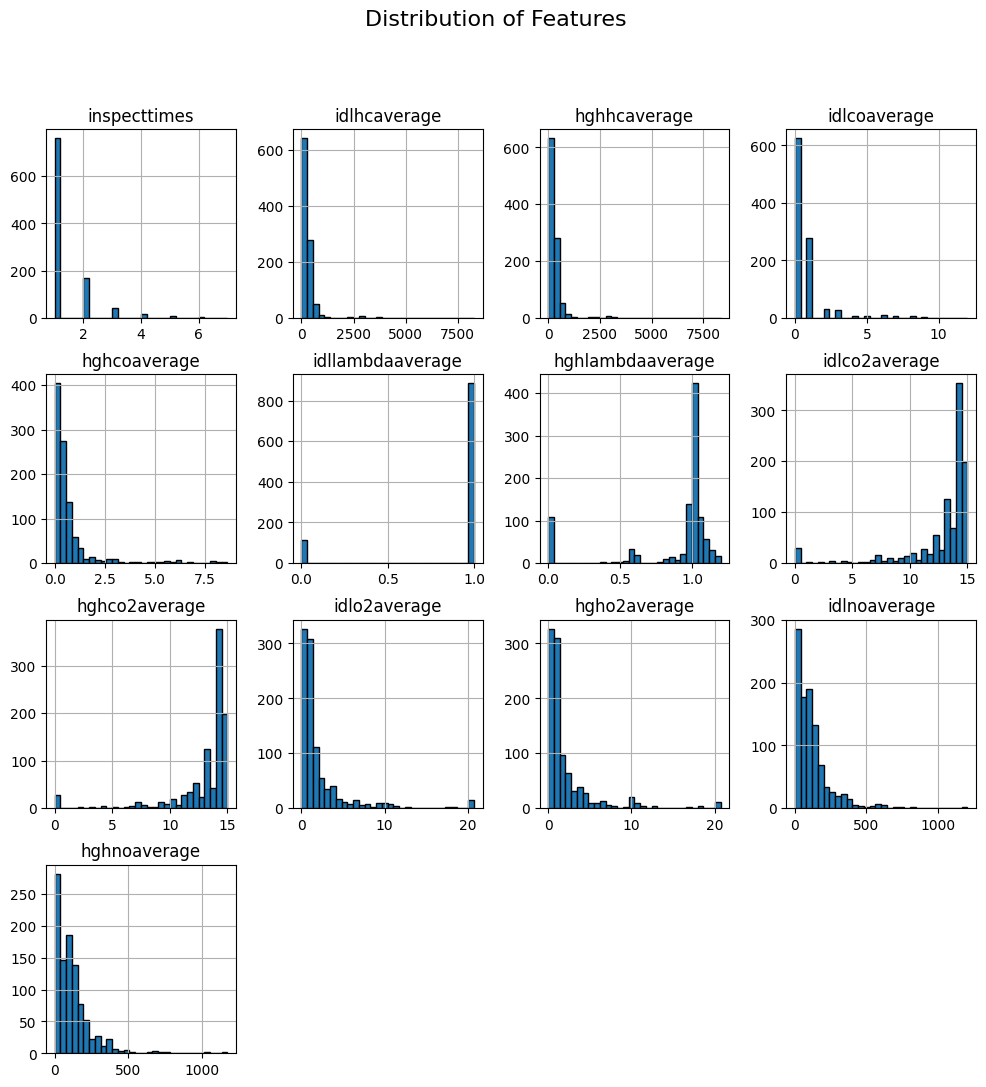

In [ ]:

# Distribution plots (histograms/KDE for all numeric features)
Emission_df.hist(figsize=(12, 12), bins=30, edgecolor="black")
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()



ideal Lambda is 1 then we remove any row that has 'idllambdaaverage' as 0

In [ ]:
Emission_df.drop('idllambdaaverage', axis=1)

,inspecttimes,idlhcaverage,hghhcaverage,idlcoaverage,hghcoaverage,hghlambdaaverage,idlco2average,hghco2average,idlo2average,hgho2average,idlnoaverage,hghnoaverage
0,1,358,410,0.0,0.17,0.60,12.5,12.5,3.80,3.75,111.5,119.5
1,2,358,410,0.0,0.17,0.60,12.5,12.5,3.80,3.75,111.5,119.5
2,1,56,44,0.0,0.02,1.01,15.0,15.0,0.39,0.35,84.5,83.0
3,1,268,268,1.0,0.51,1.01,14.0,14.0,0.97,0.90,77.5,82.5
4,1,637,480,0.0,0.16,0.00,9.5,10.0,7.06,6.60,21.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,163,164,1.0,0.97,0.99,14.0,14.0,0.66,0.66,74.0,80.0
996,1,124,120,0.0,0.37,1.08,13.0,13.0,2.08,2.01,45.0,41.0
997,1,426,424,1.0,1.16,1.00,13.0,13.0,1.17,1.24,227.0,269.5
998,1,151,146,0.0,0.43,1.01,14.0,14.0,0.69,0.72,205.5,190.5


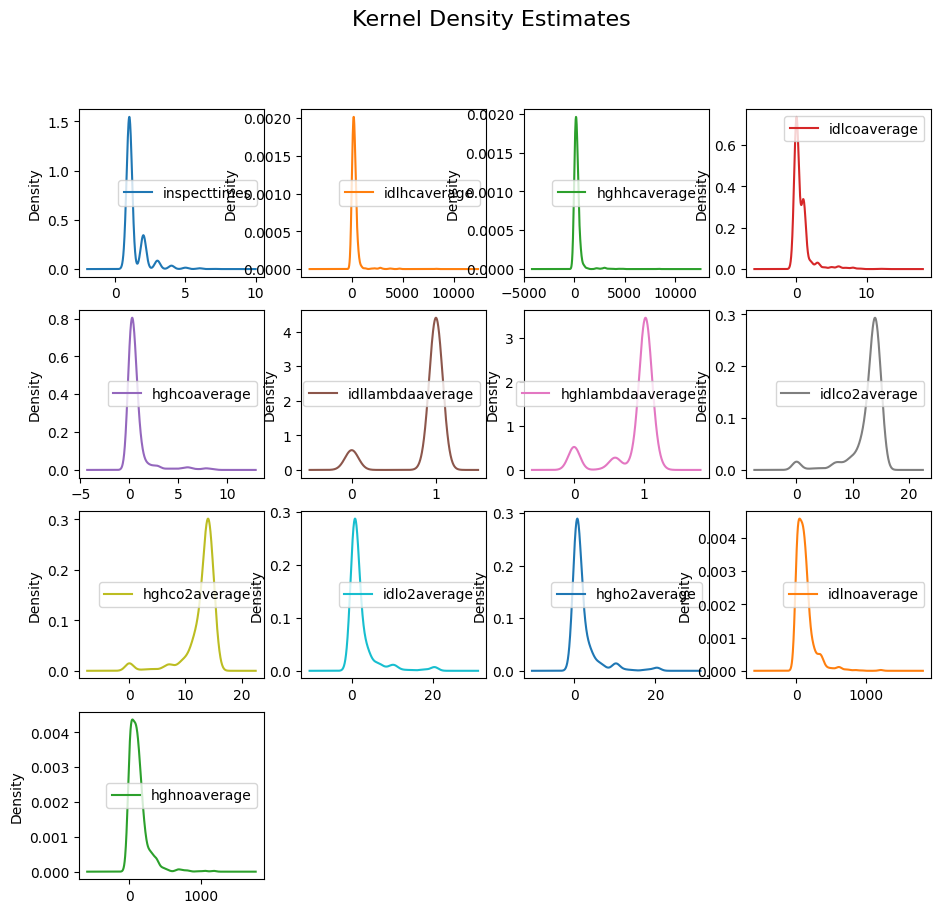

In [ ]:
# KDE plots for smoother view
Emission_df.plot(kind="kde", subplots=True, layout=(4,4), figsize=(11,10), sharex=False)
plt.suptitle("Kernel Density Estimates", fontsize=16)
plt.show()


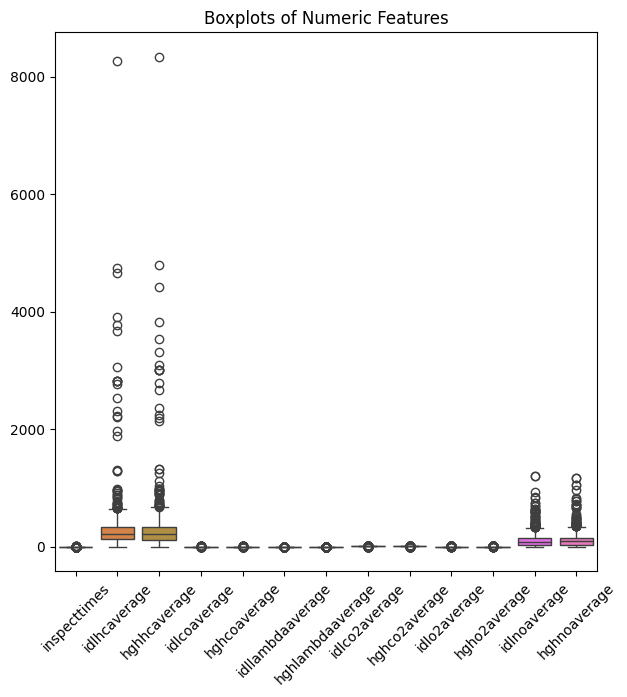

In [ ]:
# 3. Boxplots for outlier detection
plt.figure(figsize=(7,7))
sns.boxplot(data=Emission_df)
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Features")
plt.show()

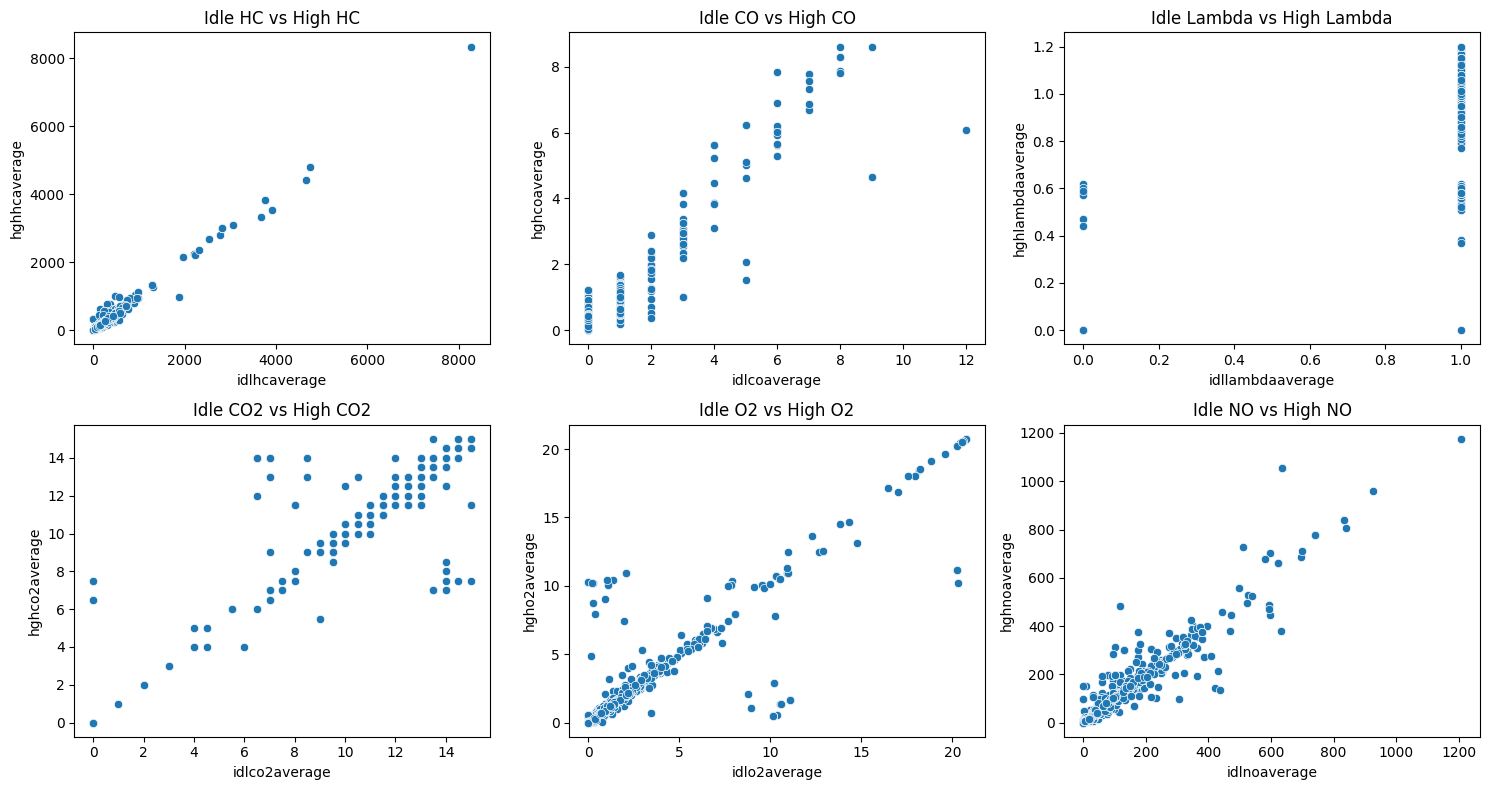

In [ ]:

# 5. Compare idle vs high load gases
fig, axes = plt.subplots(2, 3, figsize=(15,8))
sns.scatterplot(x="idlhcaverage", y="hghhcaverage", data=Emission_df, ax=axes[0,0])
axes[0,0].set_title("Idle HC vs High HC")

sns.scatterplot(x="idlcoaverage", y="hghcoaverage", data=Emission_df, ax=axes[0,1])
axes[0,1].set_title("Idle CO vs High CO")

sns.scatterplot(x="idllambdaaverage", y="hghlambdaaverage", data=Emission_df, ax=axes[0,2])
axes[0,2].set_title("Idle Lambda vs High Lambda")

sns.scatterplot(x="idlco2average", y="hghco2average", data=Emission_df, ax=axes[1,0])
axes[1,0].set_title("Idle CO2 vs High CO2")

sns.scatterplot(x="idlo2average", y="hgho2average", data=Emission_df, ax=axes[1,1])
axes[1,1].set_title("Idle O2 vs High O2")

sns.scatterplot(x="idlnoaverage", y="hghnoaverage", data=Emission_df, ax=axes[1,2])
axes[1,2].set_title("Idle NO vs High NO")

plt.tight_layout()
plt.show()

## FEATURE ENGINEERING

In this study, the prediction of CO₂ emissions is guided by the principle of carbon mass conservation, ensuring that the neural network respects physical laws in addition to learning from data. The mass balance for carbon in combustion can be expressed as:



Combustion of hydrocarbon fuel ideally follows the stoichiometric reaction, where all carbon in the fuel is fully converted to carbon dioxide (CO₂) and all hydrogen to water (H₂O). For a generic hydrocarbon
𝐶
𝑥
𝐻
𝑦
, the ideal combustion can be written as:

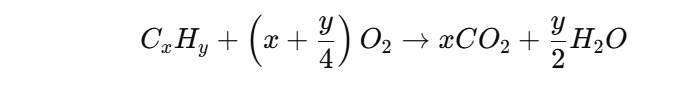

Here, all carbon atoms from the fuel are converted into CO₂. In practice, combustion is often unstoichiometric, meaning some carbon remains as carbon monoxide (CO) due to incomplete combustion. This can be represented as:

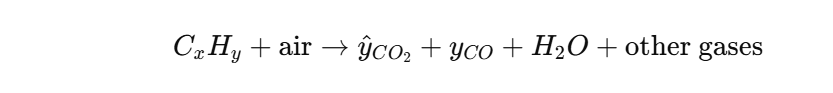

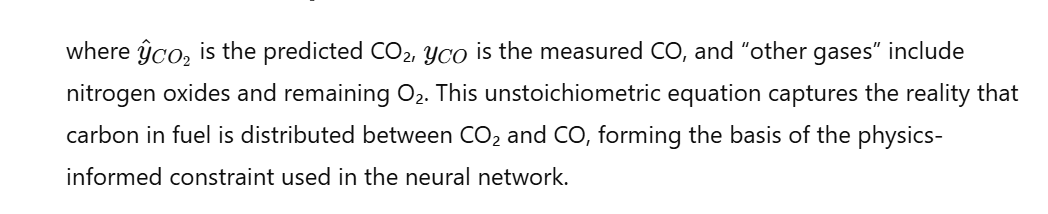

From this physical principle, the carbon mass balance is enforced in the neural network as:

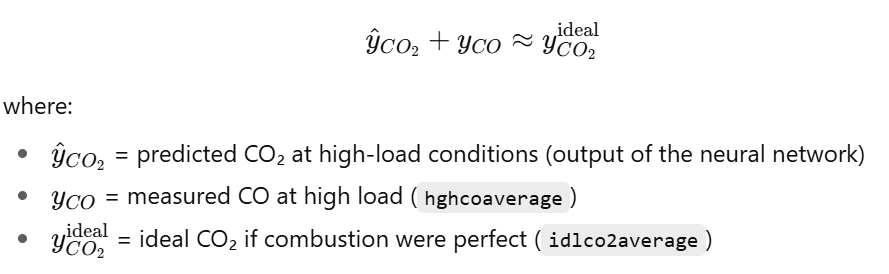

In feature engineering, input variables such as fuel inputs (idlhcaverage, hghhcaverage) and air-fuel ratios (idllambdaaverage, hghlambdaaverage) are used to predict CO₂. Other species like O₂ and NO are not included in this physics-based loss because they do not contain carbon and therefore do not directly affect carbon conservation. This ensures the neural network is physically grounded, learning from real data while obeying the law of carbon conservation, producing predictions that are both accurate and chemically consistent.

## PHYSICS INFORMED NEURAL NETWORK TASK

In [ ]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In this study, the prediction of CO₂ emissions from combustion is guided not only by data-driven learning but also by fundamental physical laws, specifically mass conservation. The key idea is that all carbon in the fuel must appear in the exhaust as either carbon dioxide (CO₂) from complete combustion or carbon monoxide (CO) from incomplete combustion. To incorporate this principle, a physics-informed neural network (PINN) is employed, where the network learns to predict CO₂ while simultaneously satisfying the carbon balance equation: the predicted CO₂ plus the measured CO should approximately equal the ideal CO₂ that would result from perfect combustion. This ensures that the neural network’s predictions are not only aligned with measured data but also consistent with the laws of chemistry, producing physically meaningful outputs even for unseen conditions.

From a feature engineering perspective, the model inputs are carefully selected to capture the combustion process, including high-load hC readings and fuel-air ratio indicators such as lambda values. Other variables like O₂ and NO, while present in the dataset, do not directly influence carbon conservation and are therefore not included in the physics-based loss for CO₂ prediction.
also, CO is a constraint, not a feature. It guides the network to respect carbon conservation without giving away the answer, If we included CO as an input, the network could “cheat” by just copying.

By focusing the physics constraint only on carbon-containing species, the network maintains simplicity and effectiveness, learning from the data while respecting the natural chemical limits. This approach balances the strengths of machine learning with the rigor of physical laws, producing predictions that are both accurate and physically consistent.

In [ ]:
# Choose inputs and outputs
inputs = Emission_df[['idlhcaverage','hghhcaverage','idllambdaaverage','hghlambdaaverage']].values
co2_target = Emission_df['hghco2average'].values
co_target = Emission_df['hghcoaverage'].values
ideal_co2 = Emission_df['idlco2average'].values


# Convert to PyTorch tensors
X = torch.tensor(inputs, dtype=torch.float32)
y_CO2 = torch.tensor(co2_target, dtype=torch.float32).view(-1,1)
y_CO = torch.tensor(co_target, dtype=torch.float32).view(-1,1)
idl_CO2 = torch.tensor(ideal_co2, dtype=torch.float32).view(-1,1)


#Necessary Library for spliting Data into test and train
from sklearn.model_selection import train_test_split

# Split 80% training, 20% testing
X_train, X_test, y_CO2_train, y_CO2_test, y_CO_train, y_CO_test, idl_CO2_train, idl_CO2_test = train_test_split(
    X, y_CO2, y_CO, idl_CO2, test_size=0.2, random_state=42
)


In [ ]:
#FEED FORWARD NEURAL NETWORK
class CO2NN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        out = self.fc3(x)
        return out

model = CO2NN(input_dim=4, hidden_dim=64, output_dim=1)


In [ ]:
def pinn_loss(y_pred, y_true, y_co, idl_co2, alpha=0.8):

    # Data loss: match measured CO2
    data_loss = nn.MSELoss()(y_pred, y_true)

    # Physics loss: enforce carbon conservation
    physics_loss = torch.mean((y_pred + y_co - idl_co2)**2)

    # Total loss
    total_loss = data_loss + alpha * physics_loss
    return total_loss

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import matplotlib.pyplot as plt

# Define intervals at which to store predictions
epoch_intervals = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

predictions_history = []

# Training loop with prediction tracking
epochs = 5000
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    optimizer.zero_grad()

    # Use X_train, y_CO2_train, y_CO_train, idl_CO2_train in your training loop
    y_pred_train = model(X_train)  # forward pass during training
    loss = pinn_loss(y_pred_train, y_CO2_train, y_CO_train, idl_CO2_train, alpha=0.1)

    loss.backward()
    optimizer.step()

    # Store prediction at specified intervals
    if epoch in epoch_intervals:
        model.eval()
        with torch.no_grad():
            predictions_history.append(y_pred_train.numpy())
        model.train()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 1.6510
Epoch 500, Loss: 1.8255
Epoch 1000, Loss: 1.7644
Epoch 1500, Loss: 1.7656
Epoch 2000, Loss: 1.6999
Epoch 2500, Loss: 2.2409
Epoch 3000, Loss: 1.6445
Epoch 3500, Loss: 1.9377
Epoch 4000, Loss: 3.1006
Epoch 4500, Loss: 1.6037


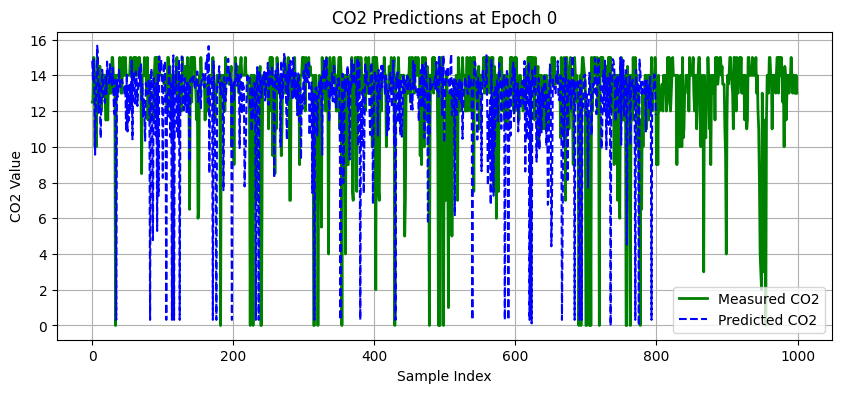

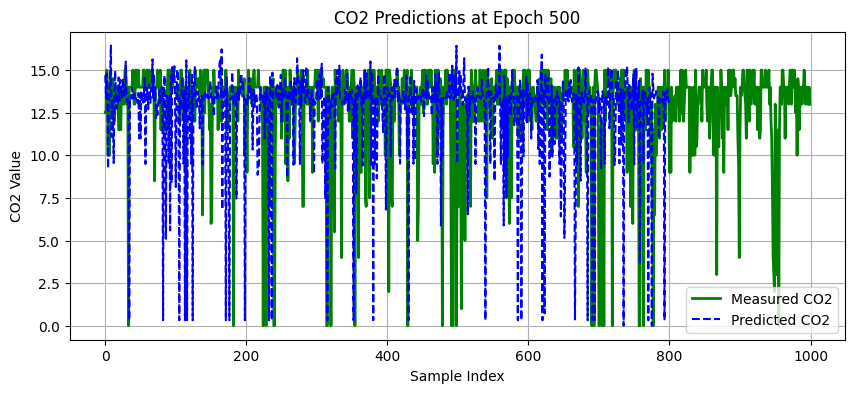

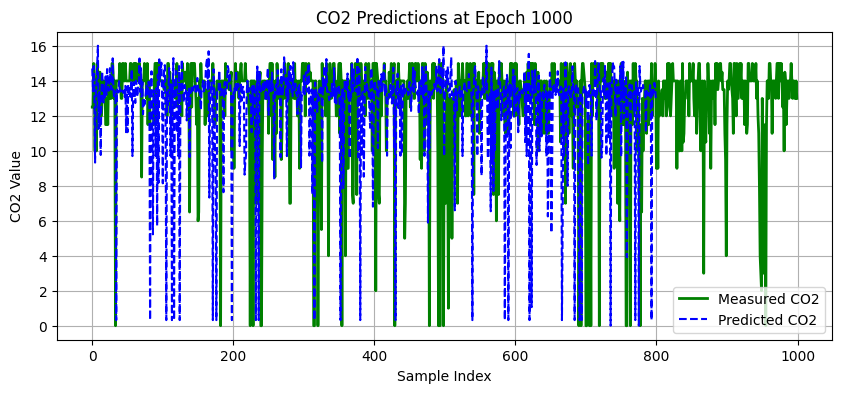

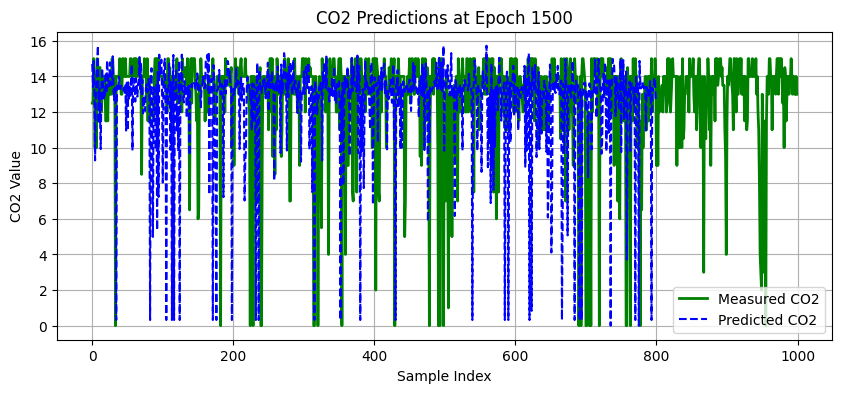

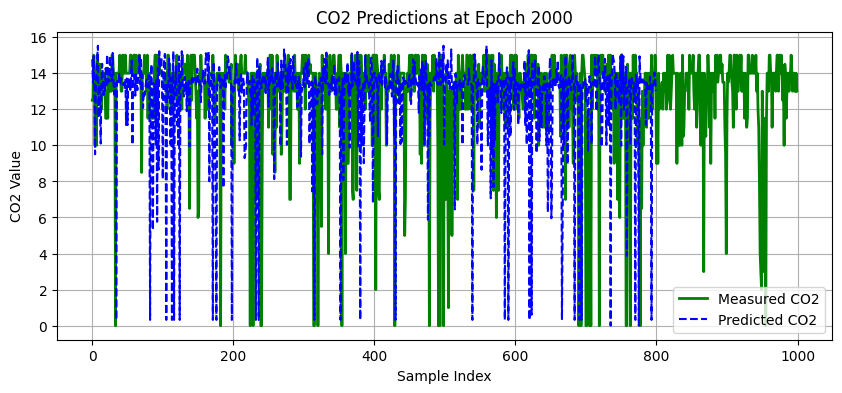

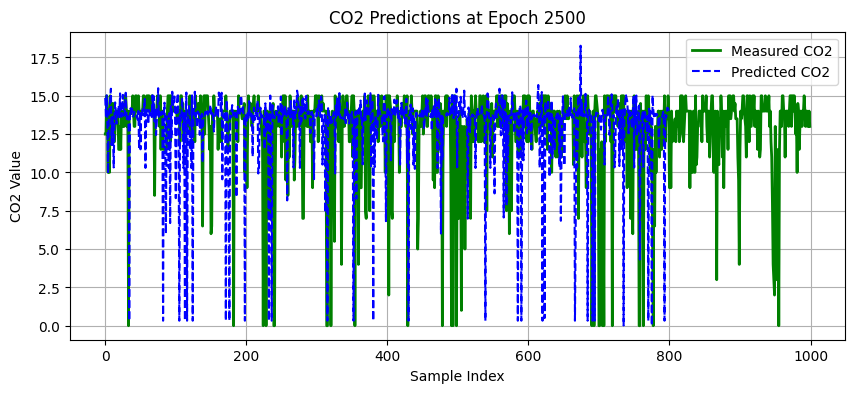

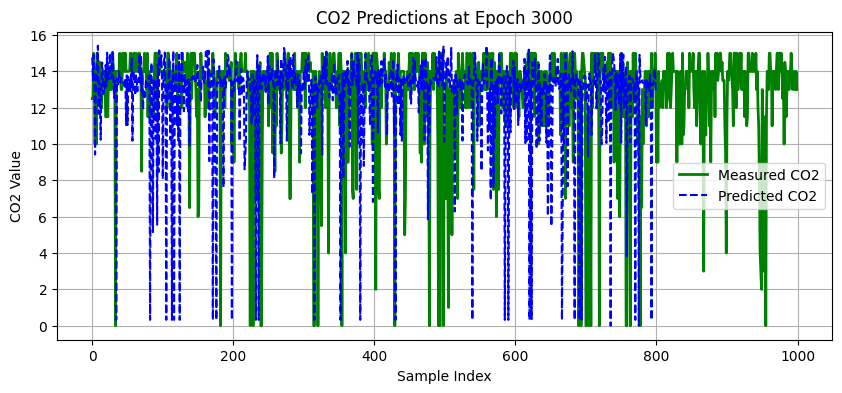

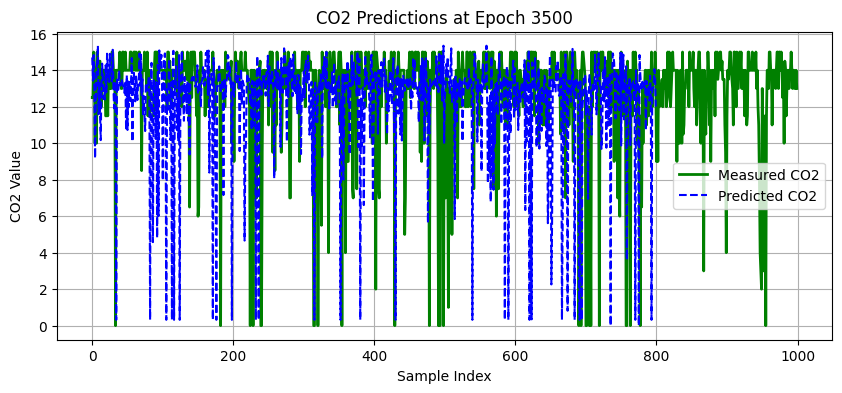

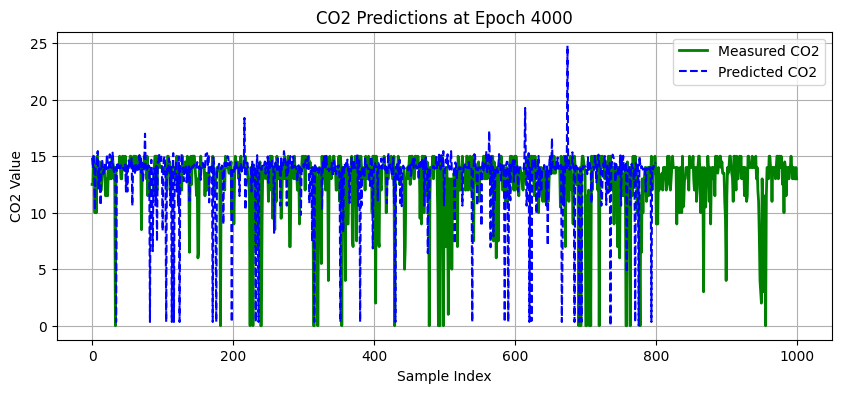

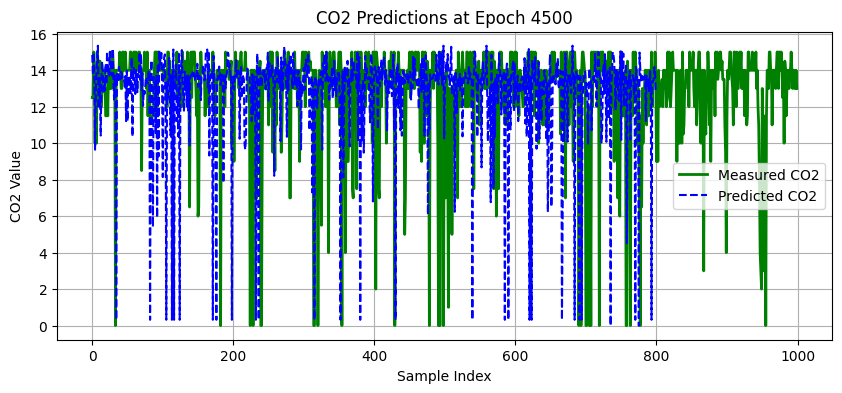

In [ ]:
import matplotlib.pyplot as plt

# Assume predictions_history and epoch_intervals are already stored as before

for i, pred in enumerate(predictions_history):
    plt.figure(figsize=(10,4))
    plt.plot(y_CO2.numpy(), label='Measured CO2', color='Green', linewidth=2)
    plt.plot(pred, label=f'Predicted CO2', color='blue', linestyle='--')
    plt.xlabel('Sample Index')
    plt.ylabel('CO2 Value')
    plt.title(f'CO2 Predictions at Epoch {epoch_intervals[i]}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:

#Evaluating the model on a test data
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

# Residuals on test set
residuals_test = y_CO2_test.numpy() - y_pred_test.numpy()


# Display residuals
display(residuals_test)

array([[-1.14395714e+00],
       [-4.66403961e-02],
       [-1.23826408e+00],
       [ 5.05076408e-01],
       [ 9.08677101e-01],
       [-1.27445221e-01],
       [-7.40950584e-01],
       [-1.33286953e+00],
       [ 5.87505341e-01],
       [-5.27925491e-02],
       [-1.03875351e+00],
       [ 2.53893852e-01],
       [ 8.40677261e-01],
       [-2.92606354e-02],
       [ 5.34402847e-01],
       [ 1.11362896e+01],
       [-6.46142960e-01],
       [-2.17635441e+00],
       [-9.09910202e-01],
       [-3.54586601e-01],
       [ 1.25942421e+00],
       [-1.17382812e+00],
       [ 1.11442566e-01],
       [ 8.37841034e-02],
       [ 1.12500191e+00],
       [ 4.99656677e-01],
       [ 1.04618073e-02],
       [-3.71770859e-01],
       [ 3.11403275e-01],
       [-6.76565075e+00],
       [-2.16854477e+00],
       [ 6.56717300e-01],
       [-1.13458252e+00],
       [-2.20998001e+00],
       [-5.54783630e+00],
       [ 1.81217194e-02],
       [ 1.65429115e-01],
       [ 2.65083313e-01],
       [ 4.3

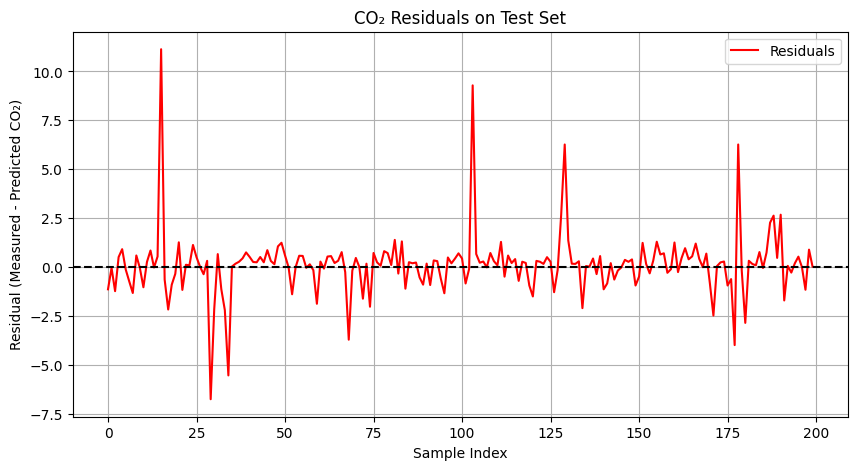

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(residuals_test, color='red', label='Residuals')
plt.axhline(0, color='black', linestyle='--')  # zero line
plt.xlabel('Sample Index')
plt.ylabel('Residual (Measured - Predicted CO₂)')
plt.title('CO₂ Residuals on Test Set')
plt.legend()
plt.grid(True)
plt.show()


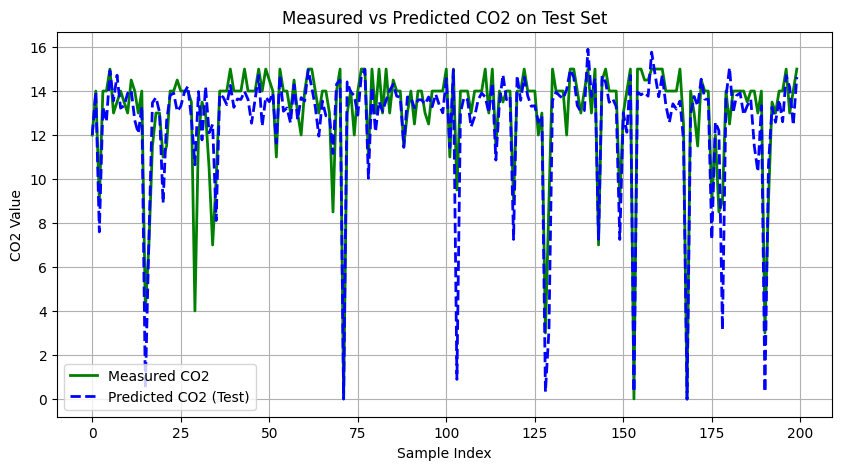

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

# Plot actual CO2
plt.plot(y_CO2_test.numpy(), label='Measured CO2', color='green', linewidth=2)

# Plot predicted CO2 on test set
plt.plot(y_pred_test.numpy(), label='Predicted CO2 (Test)', color='blue', linestyle='--', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('CO2 Value')
plt.title('Measured vs Predicted CO2 on Test Set')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# L2 relative error
L2_error = np.sqrt(np.sum(residuals_test**2) / np.sum(y_CO2_test.numpy()**2))
print(f"L2 Relative Error: {L2_error:.4f}")

# Maximum absolute error
max_abs_error = np.max(np.abs(residuals_test))
print(f"Max Absolute Error: {max_abs_error:.4f}")

L2 Relative Error: 0.1236
Max Absolute Error: 11.1363


The evaluation of the CO₂ Physics-Informed Neural Network (PINN) shows that the model achieves a relative L2 error of 0.1236, indicating that the predicted CO₂ values, on average, deviate approximately 12.36% from the measured values. This demonstrates that the network is capable of capturing the overall trends in the data while balancing the physics-based constraints imposed by carbon mass conservation. The relatively low L2 error reflects that the feedforward PINN successfully integrates both data fidelity and the physics-informed component, allowing it to generate predictions that are generally consistent with experimental observations.

However, the maximum absolute error of 11.1363 highlights that there are individual data points where the model’s predictions deviate significantly from the actual measurements. Such outliers indicate that, while the model captures general trends well, it may underperform on specific high-variance or edge-case samples. Analyzing the residuals further confirms that most errors are small and centered around zero, with only a few extreme deviations. Overall, the error analysis suggests that the CO₂ PINN is reliable for predicting general emission patterns, but careful attention to outlier handling or additional feature engineering may further improve robustness.

## CONCLUSION

In this project, a Physics-Informed Neural Network (PINN) was developed to predict CO₂ emissions from combustion processes by integrating experimental measurements with the fundamental principle of carbon mass conservation. The model combines a data-driven loss, which enforces agreement with measured high-load CO₂ values, and a physics-informed loss, which ensures that the sum of predicted CO₂ and measured CO approaches the ideal CO₂ expected under stoichiometric combustion. This dual-loss formulation allows the network to remain physically consistent while capturing complex, nonlinear relationships in the data. Features such as hydrocarbon content (idlhcaverage, hghhcaverage) and air–fuel ratio (idllambdaaverage, hghlambdaaverage) were used, as they directly influence CO₂ formation and reflect both the chemical and operational conditions.

The feedforward PINN demonstrated strong predictive performance, achieving an L2 relative error of 0.1236 and a maximum absolute error of 11.1363 on the test set. These metrics indicate that, on average, predictions are within ~12% of the measured CO₂ values, while some high-variance samples exhibit larger deviations. Model performance was influenced by key hyperparameters such as the learning rate, which controlled the convergence speed, and α, the weight applied to the physics loss, which balanced data fidelity against physical consistency. The nature of the dataset—primarily containing high- and low-load conditions with measured hydrocarbons and ideal CO₂—provides a robust baseline but could be enriched with additional measurements, such as CO and NO emissions, to improve the network’s ability to capture incomplete combustion effects.

To further enhance accuracy and generalization, several strategies can be employed: fine-tuning the network architecture (number of layers and neurons), optimizing the learning rate schedule, adjusting the α parameter to better balance data and physics losses, expanding the feature set to include additional emission species, and increasing the dataset size to cover a wider range of combustion conditions. Incorporating these improvements would likely reduce both overall L2 error and maximum absolute error, resulting in a more reliable and physically grounded predictive model for CO₂ emissions. Overall, this project demonstrates that integrating physics knowledge with neural networks provides a powerful approach to modeling complex engineering processes, producing predictions that are both accurate and interpretable.

## FUTURE REASERCH

Future research can extend the application of Physics-Informed Neural Networks in emission modeling and combustion analysis by incorporating multi-species prediction, such as CO, NO, and particulate matter, alongside CO₂. By leveraging larger and more diverse datasets, including real-time sensor measurements from industrial engines or laboratory experiments, the network can be trained to capture a broader spectrum of operating conditions and chemical behaviors. Additionally, integrating advanced architectures, such as deep or recurrent PINNs, and incorporating uncertainty quantification could further enhance predictive robustness and reliability. These improvements would enable researchers to develop physically consistent, data-driven models capable of guiding emission reduction strategies, optimizing combustion efficiency, and informing environmental regulatory compliance.

Beyond combustion science, the methodologies developed in this project can be applied to related engineering and environmental domains. For instance, PINNs could be used in process control, chemical reaction modeling, and energy system optimization, where physical laws govern system behavior but measurements are sparse or noisy. Similarly, in environmental monitoring and climate modeling, integrating physics constraints with observational data can improve predictions of pollutant dispersion or greenhouse gas emissions. Future work could also explore the integration of PINNs with real-time digital twins, enabling adaptive control and monitoring in industrial and urban systems. Overall, expanding PINNs in these directions offers a promising avenue for high-impact research at the intersection of machine learning, engineering, and applied physics.